# Decison Trees

First we'll load some fake data on past hires I made up. Note how we use pandas to convert a csv file into a DataFrame:

In [122]:
import numpy as np
import pandas as pd 
from sklearn import tree

df = pd.read_csv("./PastHires.csv")

In [123]:
df

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,Y,4,BS,N,N,Y
1,0,N,0,BS,Y,Y,Y
2,7,N,6,BS,N,N,N
3,2,Y,1,MS,Y,N,Y
4,20,N,2,PhD,Y,N,N
5,0,N,0,PhD,Y,Y,Y
6,5,Y,2,MS,N,Y,Y
7,3,N,1,BS,N,Y,Y
8,15,Y,5,BS,N,N,Y
9,0,N,0,BS,N,N,N


scikit-learn needs everything to be numerical for decision trees to work. So, we'll map Y,N to 1,0 and levels of education to some scale of 0-2. In the real world, you'd need to think about how to deal with unexpected or missing data! By using map(), we know we'll get NaN for unexpected values.

In [124]:
d = {'Y': 1, 'N': 0}
df['Hired'] = df['Hired'].map(d) # change Y: 1, N: 0... map ({Y:1})
df['Employed?'] = df['Employed?'].map(d)
df['Top-tier school'] = df['Top-tier school'].map(d)
df['Interned'] = df['Interned'].map(d)
d = {'BS': 0, 'MS': 1, 'PhD': 2}
df['Level of Education'] = df['Level of Education'].map(d)
df

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,1,4,0,0,0,1
1,0,0,0,0,1,1,1
2,7,0,6,0,0,0,0
3,2,1,1,1,1,0,1
4,20,0,2,2,1,0,0
5,0,0,0,2,1,1,1
6,5,1,2,1,0,1,1
7,3,0,1,0,0,1,1
8,15,1,5,0,0,0,1
9,0,0,0,0,0,0,0


Next we need to separate the features from the target column that we're trying to bulid a decision tree for.

In [84]:
features = list(df.columns[:6])
features

['Years Experience',
 'Employed?',
 'Previous employers',
 'Level of Education',
 'Top-tier school',
 'Interned']

Now actually construct the decision tree:

In [119]:
y = df["Hired"]
X = df[features]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,y)

 

... and display it. Note you need to have pydotplus installed for this to work. (!pip install pydotplus)

To read this decision tree, each condition branches left for "true" and right for "false". When you end up at a value, the value array represents how many samples exist in each target value. So value = [0. 5.] mean there are 0 "no hires" and 5 "hires" by the tim we get to that point. value = [3. 0.] means 3 no-hires and 0 hires.

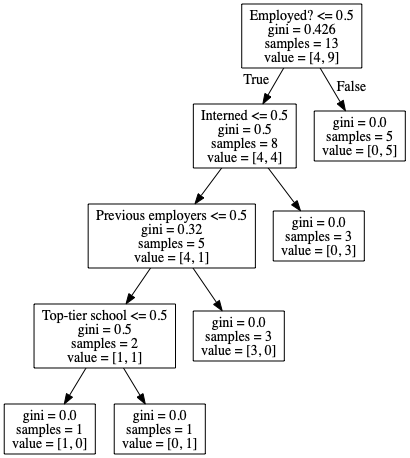

In [87]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
import pydotplus

dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=features)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

 

## Ensemble learning: using a random forest

We'll use a random forest of 10 decision trees to predict employment of specific candidate profiles:

In [150]:


from sklearn.ensemble import RandomForestClassifier 

clf = RandomForestClassifier(n_estimators = 100)
clf = clf.fit(X,y)

print(clf.predict([[0,0,0,2,0,0]]))
print(clf.predict([[2,1,2,0,0,0]]))
print(clf.predict([[0,1,0,0,0,0]]))
print(clf.predict([[0,0,0,0,1,0]]))
print(clf.predict([[0,0,0,2,1,0]]))
print(clf.predict([[0,1,0,0,0,0]]))

[1]
[1]
[1]
[1]
[1]
[1]


## Activity

Modify the test data to create an alternate universe where everyone I hire everyone I normally wouldn't have, and vice versa. Compare the resulting decision tree to the one from the original data.

In [153]:

import numpy as np 
import pandas as pd 
from sklearn import tree

df = pd.read_csv("./PastHires.csv")
df

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,0,0,2,2,0,0,1
1,2,0,2,0,0,1,1
2,1,0,2,1,1,0,0
3,2,1,0,0,0,0,0
4,2,1,0,0,0,1,0


In [154]:
features = list(df.columns[:6])
features

['Years Experience',
 'Employed?',
 'Previous employers',
 'Level of Education',
 'Top-tier school',
 'Interned']

In [156]:
y = df['Hired']
X = df[features]

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,y)


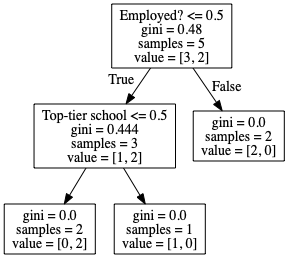

In [158]:
from IPython.display import Image 
from sklearn.externals.six import StringIO
import pydotplus

dot_data = StringIO()
tree.export_graphviz( clf, out_file = dot_data, 
                    feature_names = features)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [159]:
#Alternate universe where everyone who was NOT employed got hired.  
#Also if they did got to a top tier school, they did NOT get hired  
#People who were not employed and did not go to a top tiered school got hired! 
